In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import category_encoders as ce
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from numpy import nan

In [99]:
train_data = pd.read_csv(r'C:\Users\user\OneDrive\Documents\code\zindi\dsn\Train.csv')
test_data = pd.read_csv(r'C:\Users\user\OneDrive\Documents\code\zindi\dsn\Test.csv')

In [100]:
train_data.shape

(56000, 52)

In [101]:
appl = test_data['Applicant_ID']
Y = train_data['default_status']

In [102]:
train_data = train_data.drop(['Applicant_ID', 'default_status', 'form_field33', 'form_field48'], axis = 1)
test_data = test_data.drop(['Applicant_ID',  'form_field33', 'form_field48'],axis = 1)

In [6]:
train_data  = train_data.dropna(axis = 1, thresh =0.7*len(train_data))

In [103]:
cols = train_data.columns
cols.size

48

In [33]:
colls = test_data.columns
col=[]

In [34]:
colls.size

48

In [35]:
for co in colls:
    if co in cols:
        col.append(co)

In [38]:
len(col)

38

In [39]:
for co in colls:
    if co not in col:
        test_data = test_data.drop(co, axis = 1)
        

In [69]:
Y.iloc[100:150 ]

100     no
101     no
102    yes
103     no
104    yes
105     no
106     no
107     no
108    yes
109    yes
110     no
111     no
112     no
113     no
114     no
115     no
116     no
117     no
118     no
119    yes
120     no
121     no
122     no
123     no
124     no
125     no
126     no
127     no
128     no
129     no
130    yes
131     no
132    yes
133     no
134     no
135     no
136     no
137     no
138     no
139     no
140     no
141     no
142     no
143     no
144     no
145     no
146     no
147     no
148     no
149     no
Name: default_status, dtype: object

In [104]:
test_data.isnull().sum()

form_field1      1110
form_field2      1709
form_field3       146
form_field4       146
form_field5       146
form_field6      5604
form_field7      2231
form_field8      5604
form_field9      3400
form_field10      147
form_field11    13398
form_field12     4183
form_field13     2463
form_field14        0
form_field15     9592
form_field16     5474
form_field17     4695
form_field18     4369
form_field19        0
form_field20      147
form_field21     6707
form_field22     8724
form_field23    12125
form_field24     5605
form_field25     2256
form_field26     3172
form_field27     3910
form_field28      147
form_field29      147
form_field30    10908
form_field31    16810
form_field32     2256
form_field34      147
form_field35     9866
form_field36      903
form_field37     2256
form_field38      147
form_field39     1829
form_field40    18828
form_field41    16349
form_field42      578
form_field43      250
form_field44     2362
form_field45    13538
form_field46     6885
form_field

In [228]:
train_data[['form_field13','form_field14','form_field22','form_field23','form_field24','form_field30','form_field6']] =train_data[['form_field6','form_field13','form_field14','form_field22','form_field23','form_field24','form_field30']].replace(0, nan)

In [229]:
test_data[['form_field13','form_field14','form_field22','form_field23','form_field24','form_field30','form_field6']] =test_data[['form_field6','form_field13','form_field14','form_field22','form_field23','form_field24','form_field30']].replace(0, nan)

In [108]:
cols = ['form_field1', 'form_field2', 'form_field3', 'form_field4',
       'form_field5', 'form_field6', 'form_field7', 'form_field8',
       'form_field9', 'form_field10', 'form_field11', 'form_field12',
       'form_field13', 'form_field14', 'form_field15', 'form_field16',
       'form_field17', 'form_field18', 'form_field19', 'form_field20',
       'form_field21', 'form_field22', 'form_field23', 'form_field24',
       'form_field25', 'form_field26', 'form_field27', 'form_field28',
       'form_field29', 'form_field30', 'form_field31', 'form_field32',
       'form_field34', 'form_field35', 'form_field36', 'form_field37',
       'form_field38', 'form_field39', 'form_field40', 'form_field41',
       'form_field42', 'form_field43', 'form_field44', 'form_field45',
       'form_field46', 'form_field49', 'form_field50']

In [106]:
cols = train_data.columns

In [14]:
#cols to change the mean
coll = [ 'form_field2','form_field6','form_field42',
       'form_field12','form_field21','form_field24' , 'form_field13','form_field14']

In [109]:
for col in cols:
    train_data[col] = train_data[col].fillna(train_data[col].mean())
    test_data[col] = test_data[col].fillna(test_data[col].mean())

In [16]:
#cols to fill with 0

colll = ['form_field4', 'form_field5', 'form_field46','form_field34', 'form_field36',
         'form_field37','form_field39','form_field38']

In [17]:
for col in colll:
    train_data[col] = train_data[col].fillna(0)
    test_data[col] = test_data[col].fillna(0)

In [18]:
col = [ 'form_field16', 'form_field17', 'form_field18', 'form_field19','form_field20']

In [19]:
for co in col:
    train_data[co] = train_data[co].fillna(0)
    test_data[co] = test_data[co].fillna(0)

In [20]:
#cols to fill with bfill
colo = []

for col in cols:
    if col not in coll:
        colo.append(col)

In [21]:
n = []
for col in colo:
    if col not in colll:
        n.append(col)

In [22]:
for col in n:
    train_data[col] = train_data[col].fillna(method = 'bfill')
    test_data[col] = test_data[col].fillna(method = 'bfill')

In [23]:
for col in n:
    train_data[col] = train_data[col].fillna(method = 'ffill')
    test_data[col] = test_data[col].fillna(method = 'ffill')

In [24]:
train_data.describe().iloc[:, 23:36]

,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field34,form_field35,form_field36,form_field37
count,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000
mean,104.558516,2622.715179,10080.938357,6184.425071,17258.055464,16514.840786,5239.117571,10942.538036,936.102679,0.228786,0.197089,12.400964,7.655107
std,381.318647,1968.944383,8784.453995,5398.750007,26922.450419,9662.682829,3126.036795,6103.313007,1042.539031,0.681140,0.575203,10.699909,9.212766
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.936250,1231.500000,3375.000000,2068.000000,60.000000,9765.000000,2312.000000,6297.000000,194.000000,0.000000,0.000000,6.000000,0.000000
50%,93.300000,2200.500000,8214.000000,5050.000000,486.000000,15057.000000,5658.000000,10677.000000,596.000000,0.000000,0.000000,10.000000,4.000000
75%,104.558516,3513.000000,14145.000000,8638.000000,60772.000000,21810.000000,7726.000000,14325.000000,1328.000000,0.000000,0.000000,16.000000,12.000000
max,31863.750000,25093.500000,73275.000000,42522.000000,60772.000000,73914.000000,25550.000000,47085.000000,21306.000000,21.000000,10.000000,200.000000,106.000000


In [110]:
train_data.isnull().sum()

form_field1     0
form_field2     0
form_field3     0
form_field4     0
form_field5     0
form_field6     0
form_field7     0
form_field8     0
form_field9     0
form_field10    0
form_field11    0
form_field12    0
form_field13    0
form_field14    0
form_field15    0
form_field16    0
form_field17    0
form_field18    0
form_field19    0
form_field20    0
form_field21    0
form_field22    0
form_field23    0
form_field24    0
form_field25    0
form_field26    0
form_field27    0
form_field28    0
form_field29    0
form_field30    0
form_field31    0
form_field32    0
form_field34    0
form_field35    0
form_field36    0
form_field37    0
form_field38    0
form_field39    0
form_field40    0
form_field41    0
form_field42    0
form_field43    0
form_field44    0
form_field45    0
form_field46    0
form_field47    0
form_field49    0
form_field50    0
dtype: int64

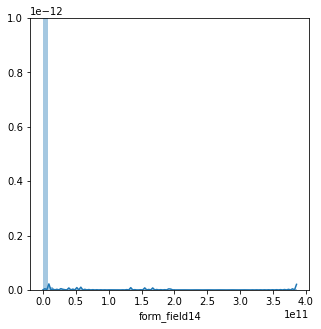

In [111]:
plt.figure(figsize=(5, 5))
sns.distplot(train_data['form_field14'])

In [112]:
lab = LabelEncoder()

Y = lab.fit_transform(Y)
se = ['form_field47']


train_data[se] = lab.fit_transform(train_data[se])
test_data[se] = lab.transform(test_data[se])

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [67]:
#Y = pd.get_dummies(Y)

In [68]:
train_data['form_field47'] = pd.get_dummies(train_data['form_field47'])
test_data['form_field47'] = pd.get_dummies(test_data['form_field47'])

In [113]:
Y = pd.DataFrame(Y, columns = ['default_status'])
Y

,default_status
0,0
1,0
2,1
3,0
4,0
...,...
55995,0
55996,1
55997,0
55998,0


In [248]:
#34,39
#4, 5
#16,20



In [114]:
se = ['form_field47']


target_enc = ce.CatBoostEncoder(cols=se)
target_enc.fit(train_data[se], Y)

train_data = train_data.join(target_enc.transform(train_data[se]).add_suffix('tar'))
test_data = test_data.join(target_enc.transform(test_data[se]).add_suffix('tar'))

In [122]:
train_data

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field49,form_field50,form_field47tar
0,3436.0,0.28505,1.6560,0.0000,0.000,0.000000,10689720.0,2.520720e+05,4.272776e+06,11333126.0,...,108.117363,0.392854,2.02,0.711632,0.00000,0.000000,0,1.129518,0.044335,0.316909
1,3456.0,0.67400,0.2342,0.0000,0.000,0.000000,898979.0,4.975310e+05,9.073814e+06,2533168.0,...,108.117363,0.314281,8.08,0.183584,0.07252,0.000000,0,1.620483,0.322436,0.316909
2,3276.0,0.53845,3.1510,0.0000,6.282,624447.924437,956940.0,2.626690e+06,1.929440e+05,1079864.0,...,108.117363,0.162965,18.18,0.791136,0.00000,0.000000,0,1.513370,0.011640,0.316909
3,3372.0,0.17005,0.5050,0.0000,0.000,192166.000000,3044703.0,3.854990e+05,3.986472e+06,3621979.0,...,108.117363,0.488884,2.02,0.685168,0.07252,0.000000,0,0.664452,0.082729,0.316909
4,3370.0,0.77270,1.1010,0.0000,0.000,1556.000000,214728.0,2.147280e+05,1.284089e+06,361770.0,...,108.117363,0.275000,12.12,0.438168,0.00000,0.000000,0,1.427891,0.045630,0.316909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,3740.0,0.01730,0.0000,0.0000,0.000,770998.000000,9637475.0,4.047934e+06,1.164199e+07,19910965.0,...,108.117363,0.000000,9.09,0.730040,0.07252,0.000000,1,0.000000,0.241598,0.111486
55996,3360.0,2.01145,0.6252,0.0000,0.000,624447.924437,927765.0,2.626690e+06,1.316002e+07,1849306.0,...,136.513500,0.297913,30.30,0.498208,0.07252,0.000000,1,0.000000,600586.172883,0.111486
55997,3500.0,0.76640,0.0000,0.0000,0.000,118645.000000,3662435.0,3.662435e+06,3.585024e+06,704090.0,...,108.117363,0.550000,3.03,0.450512,0.00000,0.000000,1,2.000000,0.163153,0.111486
55998,3280.0,0.05235,2.0916,2.2212,0.000,624447.924437,3458599.0,2.626690e+06,1.155330e+05,3458599.0,...,150.000000,0.942854,0.00,0.705048,1.00000,0.000000,0,0.000000,0.002997,0.316909


In [251]:
#out = IsolationForest(contamination = 0.1)

#ye = out.fit_predict(train_data)

In [252]:
#mask = (ye != -1)



In [253]:
#train_data, Y = train_data[mask], Y[mask]

In [115]:
cols = train_data.columns

In [116]:
train_x, test_x, train_y, test_y = train_test_split(train_data, Y, test_size = 0.3)

In [117]:
test_data

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field49,form_field50,form_field47tar
0,3236.000000,0.34875,10.2006,0.0000,0.0000,4.185640e+05,4.185640e+05,4.185640e+05,5.407100e+05,0.0,...,108.209648,0.825000,1.01,0.800000,0.066526,0.000000,0,0.000000,0.011221,0.316909
1,3284.000000,1.27360,2.9606,9.0198,0.0000,0.000000e+00,9.858816e+06,4.901400e+04,1.510098e+06,18308285.0,...,18.841500,0.507694,4.04,0.623248,1.000000,0.000000,1,0.504974,0.043525,0.111486
2,3492.284404,0.27505,0.0600,0.0000,0.0000,6.263036e+05,6.797033e+06,2.654142e+06,1.350593e+07,0.0,...,108.209648,0.369684,0.00,0.566219,0.066526,0.097926,0,0.000000,674984.349339,0.316909
3,3232.000000,0.28505,2.8032,0.0000,0.0000,0.000000e+00,4.738020e+05,4.738020e+05,1.724437e+06,493641.0,...,108.209648,0.916663,2.02,0.464224,0.066526,0.097926,0,0.788809,0.104029,0.316909
4,3466.000000,2.09545,0.8318,2.5182,0.0000,1.983900e+04,1.150662e+06,1.150662e+06,7.860523e+06,5752921.0,...,108.209648,0.234047,23.23,0.726688,0.000000,0.000000,1,1.637733,0.163124,0.111486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,3258.000000,0.37925,0.5698,5.1282,0.0000,6.263036e+05,2.280318e+06,2.654142e+06,1.350593e+07,2280318.0,...,92.691000,1.100000,0.00,0.800000,0.066526,1.000000,0,0.000000,674984.349339,0.316909
23996,3514.000000,0.95260,0.0000,0.0000,0.0000,1.494538e+06,4.773419e+06,4.773419e+06,8.971857e+07,12999991.0,...,125.022000,0.000000,12.12,0.196400,0.000000,0.000000,0,3.000000,0.930931,0.316909
23997,3302.000000,0.05755,4.2394,0.0000,25.4376,6.263036e+05,4.940300e+04,2.654142e+06,1.350593e+07,49403.0,...,108.209648,1.100000,1.01,0.800000,0.066526,0.000000,0,4.855060,674984.349339,0.316909
23998,3334.000000,0.75670,1.4428,0.0000,0.0000,0.000000e+00,2.513329e+06,3.773300e+04,3.936680e+05,2551062.0,...,31.195500,0.440000,2.02,0.519776,0.066526,0.000000,0,0.818733,0.023749,0.316909


In [118]:
train_x.shape

(39200, 49)

In [119]:
train_x.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field49,form_field50,form_field47tar
9696,3458.0,0.20605,0.2370,0.0000,0.4824,76244.000000,2.007240e+06,7.624400e+04,9993021.0,2395462.0,...,145.318500,0.334785,1.01,0.721152,0.00000,0.000000,0,0.389976,4.353878e+02,0.316909
34366,3678.0,0.58505,0.0000,0.0000,0.0000,222119.000000,8.982010e+06,8.982010e+06,16865484.0,18637768.0,...,87.499500,0.000000,9.09,0.717424,0.00000,0.000000,1,1.000000,1.686548e+07,0.111486
47487,3206.0,0.19705,6.2458,0.0000,28.5102,115533.000000,1.021514e+06,1.021514e+06,1763726.0,115533.0,...,108.117363,1.032306,1.01,0.563377,0.07252,0.095371,1,3.934721,2.859485e-01,0.111486
3041,3220.0,1.61880,8.0926,5.2218,0.0000,624447.924437,6.865210e+06,2.626690e+06,9194015.0,0.0,...,108.117363,0.611116,0.00,0.563377,0.07252,1.000000,0,0.000000,5.299922e-01,0.316909
1160,3298.0,0.18095,0.0536,0.0000,0.0000,0.000000,5.173700e+05,4.940300e+04,1576617.0,542266.0,...,108.117363,0.550000,5.05,0.605536,0.07252,0.000000,1,3.796507,7.175103e-02,0.111486


In [77]:
sca = StandardScaler()

train_x = sca.fit_transform(train_x)
test_x = sca.transform(test_x)

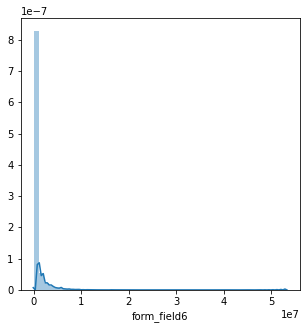

In [34]:
plt.figure(figsize=(5, 5))
sns.distplot(train_data['form_field6'])

In [120]:
train_x = pd.DataFrame(train_x, columns = cols)
test_x = pd.DataFrame(test_x, columns = cols)

In [35]:
import xgboost
import catboost 
import lightgbm

In [235]:
best_params={
 
 'depth': 9,


 'learning_rate': 0.01,

 
  'iterations' :1700, 'early_stopping_rounds':500          }
#objective ='binary:logistic',  learning_rate = 0.0345,
#max_depth = 7, alpha = 9, n_estimators = 800

In [123]:
xgb = xgboost.XGBClassifier(n_estimators =1000)
cat = catboost.CatBoostClassifier()
lgb = lightgbm.LGBMClassifier(n_estimators = 2000)

In [124]:
xgb.fit(train_x, train_y)


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [125]:
cat.fit(train_x, train_y)

Learning rate set to 0.049348
0:	learn: 0.6661722	total: 77.3ms	remaining: 1m 17s
1:	learn: 0.6401104	total: 114ms	remaining: 56.8s
2:	learn: 0.6172192	total: 157ms	remaining: 52.2s
3:	learn: 0.5948555	total: 231ms	remaining: 57.6s
4:	learn: 0.5766856	total: 295ms	remaining: 58.7s
5:	learn: 0.5588142	total: 341ms	remaining: 56.5s
6:	learn: 0.5454952	total: 394ms	remaining: 55.9s
7:	learn: 0.5327895	total: 447ms	remaining: 55.4s
8:	learn: 0.5209640	total: 498ms	remaining: 54.8s
9:	learn: 0.5121677	total: 540ms	remaining: 53.4s
10:	learn: 0.5026614	total: 590ms	remaining: 53.1s
11:	learn: 0.4951649	total: 660ms	remaining: 54.4s
12:	learn: 0.4883239	total: 713ms	remaining: 54.1s
13:	learn: 0.4817327	total: 793ms	remaining: 55.8s
14:	learn: 0.4759463	total: 862ms	remaining: 56.6s
15:	learn: 0.4709672	total: 908ms	remaining: 55.9s
16:	learn: 0.4664827	total: 959ms	remaining: 55.4s
17:	learn: 0.4617153	total: 1.01s	remaining: 55s
18:	learn: 0.4580022	total: 1.06s	remaining: 54.8s
19:	learn: 

164:	learn: 0.3934936	total: 9.23s	remaining: 46.7s
165:	learn: 0.3933807	total: 9.3s	remaining: 46.7s
166:	learn: 0.3932561	total: 9.36s	remaining: 46.7s
167:	learn: 0.3931483	total: 9.41s	remaining: 46.6s
168:	learn: 0.3931158	total: 9.45s	remaining: 46.5s
169:	learn: 0.3930392	total: 9.57s	remaining: 46.7s
170:	learn: 0.3928597	total: 9.69s	remaining: 47s
171:	learn: 0.3927733	total: 9.75s	remaining: 47s
172:	learn: 0.3926490	total: 9.84s	remaining: 47.1s
173:	learn: 0.3925229	total: 9.94s	remaining: 47.2s
174:	learn: 0.3924347	total: 10s	remaining: 47.2s
175:	learn: 0.3923072	total: 10.1s	remaining: 47.1s
176:	learn: 0.3922059	total: 10.1s	remaining: 47.1s
177:	learn: 0.3921497	total: 10.2s	remaining: 47.1s
178:	learn: 0.3920611	total: 10.2s	remaining: 46.9s
179:	learn: 0.3919391	total: 10.3s	remaining: 46.9s
180:	learn: 0.3918107	total: 10.3s	remaining: 46.8s
181:	learn: 0.3916951	total: 10.4s	remaining: 46.8s
182:	learn: 0.3916465	total: 10.5s	remaining: 47s
183:	learn: 0.3915618

325:	learn: 0.3759599	total: 18.4s	remaining: 38.1s
326:	learn: 0.3758792	total: 18.5s	remaining: 38s
327:	learn: 0.3758730	total: 18.5s	remaining: 37.9s
328:	learn: 0.3757620	total: 18.6s	remaining: 37.8s
329:	learn: 0.3756496	total: 18.6s	remaining: 37.8s
330:	learn: 0.3755118	total: 18.7s	remaining: 37.7s
331:	learn: 0.3753846	total: 18.7s	remaining: 37.6s
332:	learn: 0.3752665	total: 18.7s	remaining: 37.5s
333:	learn: 0.3751508	total: 18.8s	remaining: 37.5s
334:	learn: 0.3750212	total: 18.8s	remaining: 37.4s
335:	learn: 0.3749268	total: 18.9s	remaining: 37.3s
336:	learn: 0.3749226	total: 18.9s	remaining: 37.3s
337:	learn: 0.3747560	total: 19s	remaining: 37.2s
338:	learn: 0.3746313	total: 19s	remaining: 37.1s
339:	learn: 0.3745400	total: 19.1s	remaining: 37s
340:	learn: 0.3745353	total: 19.1s	remaining: 37s
341:	learn: 0.3744394	total: 19.2s	remaining: 36.9s
342:	learn: 0.3743042	total: 19.2s	remaining: 36.8s
343:	learn: 0.3741826	total: 19.3s	remaining: 36.8s
344:	learn: 0.3740818	

484:	learn: 0.3598361	total: 27.4s	remaining: 29.1s
485:	learn: 0.3597156	total: 27.5s	remaining: 29s
486:	learn: 0.3596420	total: 27.5s	remaining: 29s
487:	learn: 0.3595048	total: 27.5s	remaining: 28.9s
488:	learn: 0.3594011	total: 27.6s	remaining: 28.8s
489:	learn: 0.3592911	total: 27.6s	remaining: 28.8s
490:	learn: 0.3591938	total: 27.7s	remaining: 28.7s
491:	learn: 0.3590944	total: 27.7s	remaining: 28.6s
492:	learn: 0.3589949	total: 27.8s	remaining: 28.6s
493:	learn: 0.3588697	total: 27.8s	remaining: 28.5s
494:	learn: 0.3588004	total: 27.8s	remaining: 28.4s
495:	learn: 0.3587048	total: 27.9s	remaining: 28.3s
496:	learn: 0.3585754	total: 27.9s	remaining: 28.3s
497:	learn: 0.3584877	total: 28s	remaining: 28.2s
498:	learn: 0.3583940	total: 28.1s	remaining: 28.2s
499:	learn: 0.3582943	total: 28.1s	remaining: 28.1s
500:	learn: 0.3582060	total: 28.2s	remaining: 28.1s
501:	learn: 0.3581175	total: 28.3s	remaining: 28.1s
502:	learn: 0.3580137	total: 28.4s	remaining: 28s
503:	learn: 0.357941

643:	learn: 0.3452910	total: 35.9s	remaining: 19.8s
644:	learn: 0.3451783	total: 35.9s	remaining: 19.8s
645:	learn: 0.3450669	total: 36s	remaining: 19.7s
646:	learn: 0.3449517	total: 36.1s	remaining: 19.7s
647:	learn: 0.3449392	total: 36.1s	remaining: 19.6s
648:	learn: 0.3448204	total: 36.2s	remaining: 19.6s
649:	learn: 0.3447014	total: 36.3s	remaining: 19.5s
650:	learn: 0.3446251	total: 36.3s	remaining: 19.5s
651:	learn: 0.3445302	total: 36.4s	remaining: 19.4s
652:	learn: 0.3444511	total: 36.4s	remaining: 19.4s
653:	learn: 0.3443446	total: 36.5s	remaining: 19.3s
654:	learn: 0.3442489	total: 36.5s	remaining: 19.2s
655:	learn: 0.3441505	total: 36.6s	remaining: 19.2s
656:	learn: 0.3440629	total: 36.7s	remaining: 19.1s
657:	learn: 0.3439844	total: 36.7s	remaining: 19.1s
658:	learn: 0.3439084	total: 36.7s	remaining: 19s
659:	learn: 0.3438187	total: 36.8s	remaining: 19s
660:	learn: 0.3437284	total: 36.9s	remaining: 18.9s
661:	learn: 0.3436483	total: 36.9s	remaining: 18.8s
662:	learn: 0.3435

804:	learn: 0.3317046	total: 44.6s	remaining: 10.8s
805:	learn: 0.3316495	total: 44.7s	remaining: 10.8s
806:	learn: 0.3315485	total: 44.7s	remaining: 10.7s
807:	learn: 0.3314666	total: 44.8s	remaining: 10.6s
808:	learn: 0.3314202	total: 44.8s	remaining: 10.6s
809:	learn: 0.3313433	total: 44.9s	remaining: 10.5s
810:	learn: 0.3312575	total: 44.9s	remaining: 10.5s
811:	learn: 0.3312199	total: 45s	remaining: 10.4s
812:	learn: 0.3311228	total: 45s	remaining: 10.4s
813:	learn: 0.3310543	total: 45.1s	remaining: 10.3s
814:	learn: 0.3309831	total: 45.1s	remaining: 10.2s
815:	learn: 0.3309053	total: 45.1s	remaining: 10.2s
816:	learn: 0.3308067	total: 45.2s	remaining: 10.1s
817:	learn: 0.3307025	total: 45.2s	remaining: 10.1s
818:	learn: 0.3305966	total: 45.3s	remaining: 10s
819:	learn: 0.3305073	total: 45.3s	remaining: 9.95s
820:	learn: 0.3304032	total: 45.4s	remaining: 9.89s
821:	learn: 0.3303063	total: 45.4s	remaining: 9.83s
822:	learn: 0.3302417	total: 45.4s	remaining: 9.77s
823:	learn: 0.3301

963:	learn: 0.3197560	total: 52.7s	remaining: 1.97s
964:	learn: 0.3196820	total: 52.8s	remaining: 1.91s
965:	learn: 0.3195993	total: 52.9s	remaining: 1.86s
966:	learn: 0.3195071	total: 52.9s	remaining: 1.81s
967:	learn: 0.3194763	total: 53s	remaining: 1.75s
968:	learn: 0.3193947	total: 53.1s	remaining: 1.7s
969:	learn: 0.3193189	total: 53.1s	remaining: 1.64s
970:	learn: 0.3192438	total: 53.1s	remaining: 1.59s
971:	learn: 0.3191814	total: 53.2s	remaining: 1.53s
972:	learn: 0.3191032	total: 53.2s	remaining: 1.48s
973:	learn: 0.3190535	total: 53.3s	remaining: 1.42s
974:	learn: 0.3189969	total: 53.3s	remaining: 1.37s
975:	learn: 0.3189449	total: 53.4s	remaining: 1.31s
976:	learn: 0.3188485	total: 53.4s	remaining: 1.26s
977:	learn: 0.3188468	total: 53.4s	remaining: 1.2s
978:	learn: 0.3187699	total: 53.5s	remaining: 1.15s
979:	learn: 0.3186688	total: 53.5s	remaining: 1.09s
980:	learn: 0.3185767	total: 53.6s	remaining: 1.04s
981:	learn: 0.3184895	total: 53.6s	remaining: 983ms
982:	learn: 0.31

In [126]:
lgb.fit(train_x, train_y)

LGBMClassifier(n_estimators=2000)

In [363]:
n_estimators = [500,1000, 1300, 1700, 2000]
max_depth = [3, 5, 7, 9]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 
learning_rate = [0.05,0.01, 0.02, 0.8, 0.07]
l2 = [1,4,6,10]

hyperF = dict(iterations = n_estimators, depth = max_depth,  
              l2_leaf_reg = l2,
              learning_rate = learning_rate )

gridFs = RandomizedSearchCV(cat, hyperF, cv = 3,
                      n_jobs = -1, scoring = 'roc_auc',random_state = 42 )
bestFs = gridFs.fit(train_x, train_y)

0:	learn: 0.6866467	total: 59.1ms	remaining: 1m 40s
1:	learn: 0.6804779	total: 112ms	remaining: 1m 34s
2:	learn: 0.6741270	total: 173ms	remaining: 1m 38s
3:	learn: 0.6680748	total: 242ms	remaining: 1m 42s
4:	learn: 0.6622866	total: 315ms	remaining: 1m 46s
5:	learn: 0.6564981	total: 375ms	remaining: 1m 45s
6:	learn: 0.6510775	total: 451ms	remaining: 1m 49s
7:	learn: 0.6454382	total: 522ms	remaining: 1m 50s
8:	learn: 0.6401098	total: 581ms	remaining: 1m 49s
9:	learn: 0.6351148	total: 646ms	remaining: 1m 49s
10:	learn: 0.6301526	total: 715ms	remaining: 1m 49s
11:	learn: 0.6253589	total: 794ms	remaining: 1m 51s
12:	learn: 0.6208111	total: 858ms	remaining: 1m 51s
13:	learn: 0.6162662	total: 924ms	remaining: 1m 51s
14:	learn: 0.6120123	total: 1.02s	remaining: 1m 55s
15:	learn: 0.6077262	total: 1.11s	remaining: 1m 57s
16:	learn: 0.6032412	total: 1.18s	remaining: 1m 56s
17:	learn: 0.5989861	total: 1.24s	remaining: 1m 56s
18:	learn: 0.5949594	total: 1.29s	remaining: 1m 54s
19:	learn: 0.5908679	

159:	learn: 0.4283492	total: 11.2s	remaining: 1m 47s
160:	learn: 0.4281132	total: 11.3s	remaining: 1m 47s
161:	learn: 0.4278699	total: 11.3s	remaining: 1m 47s
162:	learn: 0.4276656	total: 11.4s	remaining: 1m 47s
163:	learn: 0.4274122	total: 11.4s	remaining: 1m 47s
164:	learn: 0.4271473	total: 11.5s	remaining: 1m 46s
165:	learn: 0.4268793	total: 11.5s	remaining: 1m 46s
166:	learn: 0.4266518	total: 11.6s	remaining: 1m 46s
167:	learn: 0.4264257	total: 11.6s	remaining: 1m 46s
168:	learn: 0.4261982	total: 11.7s	remaining: 1m 45s
169:	learn: 0.4259479	total: 11.8s	remaining: 1m 45s
170:	learn: 0.4257274	total: 11.8s	remaining: 1m 45s
171:	learn: 0.4254974	total: 11.9s	remaining: 1m 45s
172:	learn: 0.4252542	total: 11.9s	remaining: 1m 45s
173:	learn: 0.4250231	total: 12s	remaining: 1m 45s
174:	learn: 0.4248030	total: 12s	remaining: 1m 44s
175:	learn: 0.4246185	total: 12.1s	remaining: 1m 44s
176:	learn: 0.4243946	total: 12.1s	remaining: 1m 44s
177:	learn: 0.4241834	total: 12.2s	remaining: 1m 4

315:	learn: 0.4082502	total: 20s	remaining: 1m 27s
316:	learn: 0.4081879	total: 20.1s	remaining: 1m 27s
317:	learn: 0.4081212	total: 20.1s	remaining: 1m 27s
318:	learn: 0.4080796	total: 20.2s	remaining: 1m 27s
319:	learn: 0.4080221	total: 20.2s	remaining: 1m 27s
320:	learn: 0.4079739	total: 20.3s	remaining: 1m 27s
321:	learn: 0.4079063	total: 20.4s	remaining: 1m 27s
322:	learn: 0.4078444	total: 20.4s	remaining: 1m 26s
323:	learn: 0.4077736	total: 20.5s	remaining: 1m 26s
324:	learn: 0.4077161	total: 20.5s	remaining: 1m 26s
325:	learn: 0.4076501	total: 20.6s	remaining: 1m 26s
326:	learn: 0.4075975	total: 20.7s	remaining: 1m 26s
327:	learn: 0.4075268	total: 20.7s	remaining: 1m 26s
328:	learn: 0.4074596	total: 20.8s	remaining: 1m 26s
329:	learn: 0.4073967	total: 20.8s	remaining: 1m 26s
330:	learn: 0.4073255	total: 20.9s	remaining: 1m 26s
331:	learn: 0.4072643	total: 20.9s	remaining: 1m 26s
332:	learn: 0.4072028	total: 21s	remaining: 1m 26s
333:	learn: 0.4071304	total: 21s	remaining: 1m 25s

473:	learn: 0.4002535	total: 28.9s	remaining: 1m 14s
474:	learn: 0.4002089	total: 29s	remaining: 1m 14s
475:	learn: 0.4001601	total: 29s	remaining: 1m 14s
476:	learn: 0.4001210	total: 29.1s	remaining: 1m 14s
477:	learn: 0.4000707	total: 29.1s	remaining: 1m 14s
478:	learn: 0.4000256	total: 29.2s	remaining: 1m 14s
479:	learn: 0.3999870	total: 29.2s	remaining: 1m 14s
480:	learn: 0.3999383	total: 29.3s	remaining: 1m 14s
481:	learn: 0.3998940	total: 29.3s	remaining: 1m 14s
482:	learn: 0.3998576	total: 29.4s	remaining: 1m 14s
483:	learn: 0.3998148	total: 29.5s	remaining: 1m 14s
484:	learn: 0.3997725	total: 29.5s	remaining: 1m 13s
485:	learn: 0.3997326	total: 29.6s	remaining: 1m 13s
486:	learn: 0.3997058	total: 29.6s	remaining: 1m 13s
487:	learn: 0.3996766	total: 29.7s	remaining: 1m 13s
488:	learn: 0.3996337	total: 29.7s	remaining: 1m 13s
489:	learn: 0.3995818	total: 29.8s	remaining: 1m 13s
490:	learn: 0.3995491	total: 29.9s	remaining: 1m 13s
491:	learn: 0.3995230	total: 30s	remaining: 1m 13s

632:	learn: 0.3941980	total: 38.2s	remaining: 1m 4s
633:	learn: 0.3941592	total: 38.3s	remaining: 1m 4s
634:	learn: 0.3941265	total: 38.3s	remaining: 1m 4s
635:	learn: 0.3940887	total: 38.4s	remaining: 1m 4s
636:	learn: 0.3940462	total: 38.5s	remaining: 1m 4s
637:	learn: 0.3939998	total: 38.5s	remaining: 1m 4s
638:	learn: 0.3939822	total: 38.6s	remaining: 1m 4s
639:	learn: 0.3939471	total: 38.7s	remaining: 1m 4s
640:	learn: 0.3939170	total: 38.7s	remaining: 1m 3s
641:	learn: 0.3938880	total: 38.8s	remaining: 1m 3s
642:	learn: 0.3938458	total: 38.8s	remaining: 1m 3s
643:	learn: 0.3938135	total: 38.9s	remaining: 1m 3s
644:	learn: 0.3937870	total: 39s	remaining: 1m 3s
645:	learn: 0.3937530	total: 39s	remaining: 1m 3s
646:	learn: 0.3937306	total: 39.1s	remaining: 1m 3s
647:	learn: 0.3936937	total: 39.1s	remaining: 1m 3s
648:	learn: 0.3936657	total: 39.2s	remaining: 1m 3s
649:	learn: 0.3936172	total: 39.3s	remaining: 1m 3s
650:	learn: 0.3935957	total: 39.3s	remaining: 1m 3s
651:	learn: 0.39

794:	learn: 0.3893442	total: 49.2s	remaining: 56s
795:	learn: 0.3893105	total: 49.3s	remaining: 56s
796:	learn: 0.3892822	total: 49.4s	remaining: 55.9s
797:	learn: 0.3892661	total: 49.4s	remaining: 55.9s
798:	learn: 0.3892472	total: 49.5s	remaining: 55.8s
799:	learn: 0.3892214	total: 49.5s	remaining: 55.7s
800:	learn: 0.3891965	total: 49.6s	remaining: 55.6s
801:	learn: 0.3891796	total: 49.6s	remaining: 55.6s
802:	learn: 0.3891616	total: 49.7s	remaining: 55.5s
803:	learn: 0.3891259	total: 49.7s	remaining: 55.4s
804:	learn: 0.3890878	total: 49.8s	remaining: 55.3s
805:	learn: 0.3890412	total: 49.8s	remaining: 55.3s
806:	learn: 0.3889956	total: 49.9s	remaining: 55.2s
807:	learn: 0.3889584	total: 49.9s	remaining: 55.1s
808:	learn: 0.3889158	total: 50s	remaining: 55s
809:	learn: 0.3888917	total: 50s	remaining: 55s
810:	learn: 0.3888684	total: 50.1s	remaining: 54.9s
811:	learn: 0.3888361	total: 50.2s	remaining: 54.8s
812:	learn: 0.3888133	total: 50.2s	remaining: 54.8s
813:	learn: 0.3887843	to

956:	learn: 0.3845877	total: 58.5s	remaining: 45.4s
957:	learn: 0.3845654	total: 58.5s	remaining: 45.3s
958:	learn: 0.3845295	total: 58.6s	remaining: 45.3s
959:	learn: 0.3845025	total: 58.6s	remaining: 45.2s
960:	learn: 0.3844840	total: 58.7s	remaining: 45.1s
961:	learn: 0.3844508	total: 58.7s	remaining: 45.1s
962:	learn: 0.3844313	total: 58.8s	remaining: 45s
963:	learn: 0.3843986	total: 58.8s	remaining: 44.9s
964:	learn: 0.3843742	total: 58.9s	remaining: 44.8s
965:	learn: 0.3843552	total: 58.9s	remaining: 44.8s
966:	learn: 0.3843226	total: 59s	remaining: 44.7s
967:	learn: 0.3842994	total: 59s	remaining: 44.6s
968:	learn: 0.3842708	total: 59.1s	remaining: 44.6s
969:	learn: 0.3842420	total: 59.2s	remaining: 44.5s
970:	learn: 0.3842107	total: 59.2s	remaining: 44.5s
971:	learn: 0.3841844	total: 59.3s	remaining: 44.4s
972:	learn: 0.3841604	total: 59.3s	remaining: 44.3s
973:	learn: 0.3841345	total: 59.4s	remaining: 44.3s
974:	learn: 0.3841203	total: 59.4s	remaining: 44.2s
975:	learn: 0.3841

1114:	learn: 0.3801118	total: 1m 7s	remaining: 35.2s
1115:	learn: 0.3800786	total: 1m 7s	remaining: 35.2s
1116:	learn: 0.3800480	total: 1m 7s	remaining: 35.1s
1117:	learn: 0.3800170	total: 1m 7s	remaining: 35s
1118:	learn: 0.3799892	total: 1m 7s	remaining: 35s
1119:	learn: 0.3799398	total: 1m 7s	remaining: 34.9s
1120:	learn: 0.3799109	total: 1m 7s	remaining: 34.9s
1121:	learn: 0.3798777	total: 1m 7s	remaining: 34.8s
1122:	learn: 0.3798431	total: 1m 7s	remaining: 34.7s
1123:	learn: 0.3797974	total: 1m 7s	remaining: 34.7s
1124:	learn: 0.3797676	total: 1m 7s	remaining: 34.6s
1125:	learn: 0.3797515	total: 1m 7s	remaining: 34.5s
1126:	learn: 0.3797190	total: 1m 7s	remaining: 34.5s
1127:	learn: 0.3796737	total: 1m 7s	remaining: 34.4s
1128:	learn: 0.3796312	total: 1m 7s	remaining: 34.3s
1129:	learn: 0.3796040	total: 1m 7s	remaining: 34.3s
1130:	learn: 0.3795825	total: 1m 7s	remaining: 34.2s
1131:	learn: 0.3795449	total: 1m 8s	remaining: 34.1s
1132:	learn: 0.3795155	total: 1m 8s	remaining: 34.

1268:	learn: 0.3751278	total: 1m 15s	remaining: 25.6s
1269:	learn: 0.3750973	total: 1m 15s	remaining: 25.5s
1270:	learn: 0.3750721	total: 1m 15s	remaining: 25.5s
1271:	learn: 0.3750474	total: 1m 15s	remaining: 25.4s
1272:	learn: 0.3750094	total: 1m 15s	remaining: 25.3s
1273:	learn: 0.3749667	total: 1m 15s	remaining: 25.3s
1274:	learn: 0.3749399	total: 1m 15s	remaining: 25.2s
1275:	learn: 0.3749129	total: 1m 15s	remaining: 25.1s
1276:	learn: 0.3748714	total: 1m 15s	remaining: 25.1s
1277:	learn: 0.3748568	total: 1m 15s	remaining: 25s
1278:	learn: 0.3748313	total: 1m 15s	remaining: 25s
1279:	learn: 0.3747869	total: 1m 15s	remaining: 24.9s
1280:	learn: 0.3747709	total: 1m 15s	remaining: 24.9s
1281:	learn: 0.3747429	total: 1m 16s	remaining: 24.8s
1282:	learn: 0.3747094	total: 1m 16s	remaining: 24.7s
1283:	learn: 0.3746738	total: 1m 16s	remaining: 24.7s
1284:	learn: 0.3746316	total: 1m 16s	remaining: 24.6s
1285:	learn: 0.3745843	total: 1m 16s	remaining: 24.5s
1286:	learn: 0.3745539	total: 1m

1423:	learn: 0.3699666	total: 1m 24s	remaining: 16.3s
1424:	learn: 0.3699242	total: 1m 24s	remaining: 16.2s
1425:	learn: 0.3699092	total: 1m 24s	remaining: 16.2s
1426:	learn: 0.3698681	total: 1m 24s	remaining: 16.1s
1427:	learn: 0.3698379	total: 1m 24s	remaining: 16.1s
1428:	learn: 0.3698058	total: 1m 24s	remaining: 16s
1429:	learn: 0.3697716	total: 1m 24s	remaining: 15.9s
1430:	learn: 0.3697334	total: 1m 24s	remaining: 15.9s
1431:	learn: 0.3697043	total: 1m 24s	remaining: 15.8s
1432:	learn: 0.3696685	total: 1m 24s	remaining: 15.8s
1433:	learn: 0.3696264	total: 1m 24s	remaining: 15.7s
1434:	learn: 0.3695827	total: 1m 24s	remaining: 15.6s
1435:	learn: 0.3695393	total: 1m 24s	remaining: 15.6s
1436:	learn: 0.3695063	total: 1m 24s	remaining: 15.5s
1437:	learn: 0.3694803	total: 1m 24s	remaining: 15.5s
1438:	learn: 0.3694462	total: 1m 24s	remaining: 15.4s
1439:	learn: 0.3694273	total: 1m 24s	remaining: 15.3s
1440:	learn: 0.3693837	total: 1m 25s	remaining: 15.3s
1441:	learn: 0.3693378	total: 

1577:	learn: 0.3650453	total: 1m 32s	remaining: 7.18s
1578:	learn: 0.3650141	total: 1m 32s	remaining: 7.13s
1579:	learn: 0.3649894	total: 1m 33s	remaining: 7.07s
1580:	learn: 0.3649596	total: 1m 33s	remaining: 7.01s
1581:	learn: 0.3649374	total: 1m 33s	remaining: 6.95s
1582:	learn: 0.3649056	total: 1m 33s	remaining: 6.89s
1583:	learn: 0.3648761	total: 1m 33s	remaining: 6.83s
1584:	learn: 0.3648534	total: 1m 33s	remaining: 6.77s
1585:	learn: 0.3648278	total: 1m 33s	remaining: 6.71s
1586:	learn: 0.3648016	total: 1m 33s	remaining: 6.65s
1587:	learn: 0.3647795	total: 1m 33s	remaining: 6.59s
1588:	learn: 0.3647523	total: 1m 33s	remaining: 6.53s
1589:	learn: 0.3647228	total: 1m 33s	remaining: 6.47s
1590:	learn: 0.3646949	total: 1m 33s	remaining: 6.41s
1591:	learn: 0.3646537	total: 1m 33s	remaining: 6.35s
1592:	learn: 0.3646211	total: 1m 33s	remaining: 6.3s
1593:	learn: 0.3645986	total: 1m 33s	remaining: 6.24s
1594:	learn: 0.3645712	total: 1m 33s	remaining: 6.18s
1595:	learn: 0.3645381	total:

In [352]:
n_estimators = [200, 500, 800, 1000]
max_depth = [3, 5, 7, 9]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 
learning_rate = [0.05, 0.02, 0.8, 0.07]

hyperF = dict(n_estimators = n_estimators, max_depth= max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf, learning_rate = learning_rate)

gridF = RandomizedSearchCV(xgb, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1, scoring = 'roc_auc')
bestF = gridF.fit(train_x, train_y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed:  5.7min finished
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[01:38:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { depth, iterations, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [368]:
print(bestFs.best_score_)

0.8373178223797194


In [ ]:
n_estimators = [200, 500, 800, 1000]
max_depth = [3, 5, 7, 9]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 
learning_rate = [0.05, 0.02, 0.8, 0.07]
verbose = [1,30,100]

hyperF = dict(iterations = n_estimators, depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf, learning_rate = learning_rate, verbose = verbose)

gridF = RandomizedSearchCV(lgb, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1, scoring = 'roc_auc')
bestFss = gridF.fit(train_x, train_y)

In [127]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
anova_filter = SelectKBest(f_classif, k=30)


anova_svm = make_pipeline(anova_filter, cat)
anova_svm.fit(train_x, train_y)
pred3 = anova_svm.predict(test_x)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Learning rate set to 0.049348
0:	learn: 0.6612013	total: 40.8ms	remaining: 40.8s
1:	learn: 0.6362284	total: 76.2ms	remaining: 38s
2:	learn: 0.6115040	total: 113ms	remaining: 37.5s
3:	learn: 0.5904247	total: 145ms	remaining: 36s
4:	learn: 0.5732632	total: 220ms	remaining: 43.8s
5:	learn: 0.5569584	total: 269ms	remaining: 44.5s
6:	learn: 0.5435041	total: 308ms	remaining: 43.6s
7:	learn: 0.5316182	total: 351ms	remaining: 43.5s
8:	learn: 0.5211006	total: 395ms	remaining: 43.5s
9:	learn: 0.5121454	total: 444ms	remaining: 43.9s
10:	learn: 0.5039138	total: 477ms	remaining: 42.9s
11:	learn: 0.4960084	total: 534ms	remaining: 44s
12:	learn: 0.4895817	total: 588ms	remaining: 44.6s
13:	learn: 0.4833004	total: 643ms	remaining: 45.3s
14:	learn: 0.4771437	total: 690ms	remaining: 45.3s
15:	learn: 0.4724224	total: 727ms	remaining: 44.7s
16:	learn: 0.4676965	total: 772ms	remaining: 44.6s
17:	learn: 0.4632528	total: 805ms	remaining: 43.9s
18:	learn: 0.4596123	total: 840ms	remaining: 43.4s
19:	learn: 0.45

161:	learn: 0.3974231	total: 7.89s	remaining: 40.8s
162:	learn: 0.3973151	total: 7.96s	remaining: 40.9s
163:	learn: 0.3972248	total: 8.02s	remaining: 40.9s
164:	learn: 0.3971423	total: 8.07s	remaining: 40.8s
165:	learn: 0.3970517	total: 8.11s	remaining: 40.7s
166:	learn: 0.3969351	total: 8.17s	remaining: 40.7s
167:	learn: 0.3968065	total: 8.21s	remaining: 40.7s
168:	learn: 0.3967314	total: 8.25s	remaining: 40.6s
169:	learn: 0.3966207	total: 8.28s	remaining: 40.4s
170:	learn: 0.3965215	total: 8.31s	remaining: 40.3s
171:	learn: 0.3964243	total: 8.34s	remaining: 40.2s
172:	learn: 0.3963664	total: 8.39s	remaining: 40.1s
173:	learn: 0.3962726	total: 8.43s	remaining: 40s
174:	learn: 0.3961608	total: 8.48s	remaining: 40s
175:	learn: 0.3960933	total: 8.52s	remaining: 39.9s
176:	learn: 0.3960247	total: 8.56s	remaining: 39.8s
177:	learn: 0.3959342	total: 8.59s	remaining: 39.7s
178:	learn: 0.3958340	total: 8.62s	remaining: 39.6s
179:	learn: 0.3957500	total: 8.65s	remaining: 39.4s
180:	learn: 0.39

320:	learn: 0.3829961	total: 15.4s	remaining: 32.5s
321:	learn: 0.3828999	total: 15.4s	remaining: 32.5s
322:	learn: 0.3828162	total: 15.5s	remaining: 32.4s
323:	learn: 0.3827442	total: 15.5s	remaining: 32.3s
324:	learn: 0.3826580	total: 15.5s	remaining: 32.2s
325:	learn: 0.3825314	total: 15.6s	remaining: 32.2s
326:	learn: 0.3824303	total: 15.6s	remaining: 32.1s
327:	learn: 0.3823121	total: 15.6s	remaining: 32s
328:	learn: 0.3822029	total: 15.7s	remaining: 32s
329:	learn: 0.3821506	total: 15.7s	remaining: 31.9s
330:	learn: 0.3820693	total: 15.8s	remaining: 31.9s
331:	learn: 0.3819667	total: 15.8s	remaining: 31.8s
332:	learn: 0.3818089	total: 15.8s	remaining: 31.7s
333:	learn: 0.3817247	total: 15.9s	remaining: 31.7s
334:	learn: 0.3816230	total: 15.9s	remaining: 31.6s
335:	learn: 0.3815152	total: 16s	remaining: 31.6s
336:	learn: 0.3814353	total: 16s	remaining: 31.5s
337:	learn: 0.3813326	total: 16.1s	remaining: 31.5s
338:	learn: 0.3812130	total: 16.1s	remaining: 31.5s
339:	learn: 0.381105

479:	learn: 0.3689322	total: 23.2s	remaining: 25.2s
480:	learn: 0.3688834	total: 23.3s	remaining: 25.1s
481:	learn: 0.3687566	total: 23.3s	remaining: 25s
482:	learn: 0.3687416	total: 23.3s	remaining: 25s
483:	learn: 0.3686269	total: 23.4s	remaining: 24.9s
484:	learn: 0.3685571	total: 23.4s	remaining: 24.8s
485:	learn: 0.3684699	total: 23.4s	remaining: 24.8s
486:	learn: 0.3683893	total: 23.5s	remaining: 24.7s
487:	learn: 0.3682911	total: 23.5s	remaining: 24.7s
488:	learn: 0.3682178	total: 23.5s	remaining: 24.6s
489:	learn: 0.3681362	total: 23.6s	remaining: 24.6s
490:	learn: 0.3680630	total: 23.6s	remaining: 24.5s
491:	learn: 0.3679748	total: 23.7s	remaining: 24.4s
492:	learn: 0.3678995	total: 23.7s	remaining: 24.4s
493:	learn: 0.3678350	total: 23.7s	remaining: 24.3s
494:	learn: 0.3677295	total: 23.8s	remaining: 24.3s
495:	learn: 0.3676485	total: 23.8s	remaining: 24.2s
496:	learn: 0.3675492	total: 23.9s	remaining: 24.1s
497:	learn: 0.3674177	total: 24s	remaining: 24.2s
498:	learn: 0.3673

640:	learn: 0.3558531	total: 29.5s	remaining: 16.5s
641:	learn: 0.3557893	total: 29.5s	remaining: 16.4s
642:	learn: 0.3557125	total: 29.5s	remaining: 16.4s
643:	learn: 0.3555943	total: 29.6s	remaining: 16.3s
644:	learn: 0.3555152	total: 29.6s	remaining: 16.3s
645:	learn: 0.3554401	total: 29.6s	remaining: 16.2s
646:	learn: 0.3553833	total: 29.7s	remaining: 16.2s
647:	learn: 0.3553120	total: 29.7s	remaining: 16.1s
648:	learn: 0.3552335	total: 29.7s	remaining: 16.1s
649:	learn: 0.3551547	total: 29.8s	remaining: 16s
650:	learn: 0.3550979	total: 29.8s	remaining: 16s
651:	learn: 0.3550280	total: 29.8s	remaining: 15.9s
652:	learn: 0.3549453	total: 29.9s	remaining: 15.9s
653:	learn: 0.3548825	total: 30s	remaining: 15.8s
654:	learn: 0.3548142	total: 30s	remaining: 15.8s
655:	learn: 0.3547035	total: 30s	remaining: 15.8s
656:	learn: 0.3546410	total: 30.1s	remaining: 15.7s
657:	learn: 0.3545696	total: 30.1s	remaining: 15.7s
658:	learn: 0.3544749	total: 30.1s	remaining: 15.6s
659:	learn: 0.3544131	

802:	learn: 0.3436621	total: 35.9s	remaining: 8.79s
803:	learn: 0.3436085	total: 35.9s	remaining: 8.75s
804:	learn: 0.3435618	total: 36s	remaining: 8.71s
805:	learn: 0.3434980	total: 36s	remaining: 8.66s
806:	learn: 0.3434964	total: 36s	remaining: 8.61s
807:	learn: 0.3434033	total: 36.1s	remaining: 8.57s
808:	learn: 0.3433528	total: 36.1s	remaining: 8.52s
809:	learn: 0.3432812	total: 36.1s	remaining: 8.47s
810:	learn: 0.3432710	total: 36.2s	remaining: 8.43s
811:	learn: 0.3431832	total: 36.2s	remaining: 8.38s
812:	learn: 0.3431094	total: 36.2s	remaining: 8.33s
813:	learn: 0.3430586	total: 36.3s	remaining: 8.29s
814:	learn: 0.3429866	total: 36.3s	remaining: 8.24s
815:	learn: 0.3429398	total: 36.3s	remaining: 8.19s
816:	learn: 0.3428527	total: 36.4s	remaining: 8.14s
817:	learn: 0.3427575	total: 36.4s	remaining: 8.1s
818:	learn: 0.3427275	total: 36.4s	remaining: 8.05s
819:	learn: 0.3426524	total: 36.5s	remaining: 8s
820:	learn: 0.3425769	total: 36.5s	remaining: 7.96s
821:	learn: 0.3424848	

964:	learn: 0.3327393	total: 42.1s	remaining: 1.53s
965:	learn: 0.3327025	total: 42.1s	remaining: 1.48s
966:	learn: 0.3326466	total: 42.2s	remaining: 1.44s
967:	learn: 0.3325794	total: 42.2s	remaining: 1.4s
968:	learn: 0.3325184	total: 42.3s	remaining: 1.35s
969:	learn: 0.3324697	total: 42.3s	remaining: 1.31s
970:	learn: 0.3323552	total: 42.3s	remaining: 1.26s
971:	learn: 0.3323136	total: 42.4s	remaining: 1.22s
972:	learn: 0.3322569	total: 42.4s	remaining: 1.18s
973:	learn: 0.3321895	total: 42.4s	remaining: 1.13s
974:	learn: 0.3321186	total: 42.5s	remaining: 1.09s
975:	learn: 0.3320522	total: 42.5s	remaining: 1.04s
976:	learn: 0.3319740	total: 42.5s	remaining: 1s
977:	learn: 0.3318852	total: 42.6s	remaining: 958ms
978:	learn: 0.3318020	total: 42.6s	remaining: 915ms
979:	learn: 0.3317431	total: 42.7s	remaining: 871ms
980:	learn: 0.3316814	total: 42.7s	remaining: 827ms
981:	learn: 0.3316378	total: 42.8s	remaining: 784ms
982:	learn: 0.3315745	total: 42.8s	remaining: 740ms
983:	learn: 0.33

In [128]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
anova_filter = SelectKBest(f_classif, k=30)


anova_xgb = make_pipeline(anova_filter, xgb)
anova_xgb.fit(train_x, train_y)
pred7 = anova_xgb.predict(test_x)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [129]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
anova_filter = SelectKBest(f_classif, k=30)


anova_lgb = make_pipeline(anova_filter, lgb)
anova_lgb.fit(train_x, train_y)
pred8 = anova_lgb.predict(test_x)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [130]:
pred1 = xgb.predict(test_x)

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29'] ['form_field1', 'form_field2', 'form_field3', 'form_field4', 'form_field5', 'form_field6', 'form_field7', 'form_field8', 'form_field9', 'form_field10', 'form_field11', 'form_field12', 'form_field13', 'form_field14', 'form_field15', 'form_field16', 'form_field17', 'form_field18', 'form_field19', 'form_field20', 'form_field21', 'form_field22', 'form_field23', 'form_field24', 'form_field25', 'form_field26', 'form_field27', 'form_field28', 'form_field29', 'form_field30', 'form_field31', 'form_field32', 'form_field34', 'form_field35', 'form_field36', 'form_field37', 'form_field38', 'form_field39', 'form_field40', 'form_field41', 'form_field42', 'form_field43', 'form_field44', 'form_field45', 'form_field46', 'form_field47', 'form_field49', 'form_field50', 'form_field47tar']
expected f4, f0, f22, f14, f15, f6, f21, f8, f9, f27, f16, f11, f17, f2, f13, f25, f28, f19, f24, f20, f7, f10, f26, f5, f23, f12, f29, f1, f18, f3 in input data
training data did not have the following fields: form_field24, form_field36, form_field27, form_field44, form_field22, form_field6, form_field45, form_field20, form_field47, form_field4, form_field19, form_field41, form_field14, form_field31, form_field13, form_field26, form_field50, form_field49, form_field46, form_field42, form_field17, form_field28, form_field43, form_field9, form_field15, form_field21, form_field29, form_field23, form_field7, form_field30, form_field35, form_field5, form_field18, form_field3, form_field1, form_field34, form_field2, form_field38, form_field11, form_field16, form_field40, form_field39, form_field47tar, form_field32, form_field8, form_field10, form_field25, form_field37, form_field12

In [131]:
pred2 = cat.predict(test_x)

In [132]:
pred4 = lgb.predict(test_x)

ValueError: Number of features of the model must match the input. Model n_features_ is 30 and input n_features is 49 

In [133]:
pred5 = anova_svm.predict(test_x)

In [ ]:
pred7 = anova_

In [42]:
from sklearn.metrics import roc_auc_score, accuracy_score

In [369]:
pred6 = bestFs.predict(test_x)

In [49]:
print(accuracy_score(test_y, pred1),
roc_auc_score(test_y, pred1))

0.7983928571428571 0.6753527289297464


In [136]:
print(accuracy_score(test_y, pred8),
roc_auc_score(test_y, pred8))

0.7936904761904762 0.6712488371045214


In [137]:
print(accuracy_score(test_y, pred7),
roc_auc_score(test_y, pred7))

0.789702380952381 0.6689052088072065


In [44]:
print( accuracy_score(test_y, pred2))
print( roc_auc_score(test_y, pred2))


0.24244047619047618
0.49952913040050034


In [220]:
print( accuracy_score(test_y, pred6))
print( roc_auc_score(test_y, pred6))

NameError: name 'pred6' is not defined

In [ ]:
print( accuracy_score(test_y, bestFs))
print( roc_auc_score(test_y, bestFs))

In [ ]:
print( accuracy_score(test_y, bestFss))
print( roc_auc_score(test_y, bestFss))

In [51]:
test_val = xgb.predict_proba(test_data)[:,1]
test_vall = cat.predict_proba(test_data)[:,1]
test_valll = lgb.predict_proba(test_data)[:,1]

In [370]:
#one =bestF.predict_proba(test_data)[:,1]
two = bestFs.predict_proba(test_data)[:,1]
#three = bestFss.predict_proba(test_data)[:,1]

In [52]:
test_vallll = anova_svm.predict_proba(test_data)[:,1]

In [53]:
sub = {'Applicant_ID': appl, 'default_status': test_val}
ans = pd.DataFrame(sub)
ans.to_csv('submission13.csv', index =False)

In [54]:
sub = {'Applicant_ID': appl, 'default_status': test_vall}
ans = pd.DataFrame(sub)
ans.to_csv('submission14.csv', index =False)

In [55]:
sub = {'Applicant_ID': appl, 'default_status': test_valll}
ans = pd.DataFrame(sub)
ans.to_csv('submission15.csv', index =False)

In [56]:
sub = {'Applicant_ID': appl, 'default_status': test_vallll}
ans = pd.DataFrame(sub)
ans.to_csv('submission16.csv', index =False)

In [371]:
sub = {'Applicant_ID': appl, 'default_status': two}
ans = pd.DataFrame(sub)
ans.to_csv('submission6.csv', index =False)

In [372]:
two

array([0.27986891, 0.55091113, 0.34199745, ..., 0.19384929, 0.49396398,
       0.22031793])

In [ ]:
xgb.